# *** ***Diabetes Prediction*** ***

### Step1: Importing the libraries.

In [311]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading a Data

In [313]:
diabetes_dataset  = pd.read_excel('diabetes_data.xlnx')

In [314]:
print(diabetes_dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [315]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step3: Performing a mapping or transformation on a specific column

In [317]:
diabetes_dataset.shape

(768, 9)

In [318]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Step 3: Creating a new binary column named “Outcome.”by using mapping

In [320]:
# Step 3: Map Outcome Column to Binary Values
diabetes_dataset['Outcome'] = diabetes_dataset['Outcome'].map({1: 'Diabetic', 0: 'Non-diabetic'})
print("Updated Outcome column:")
print(diabetes_dataset.head())

Updated Outcome column:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non-diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non-diabetic  
4                     2.288   33      Diabetic  


In [321]:
# separating the data and lables
X = diabetes_dataset.drop(columns= 'Outcome',axis = 1)
Y = diabetes_dataset['Outcome']

In [322]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


### Step 4: Creating a histogram using 'plt.hist' to visualize the distribution of the “Outcome” column

In [324]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


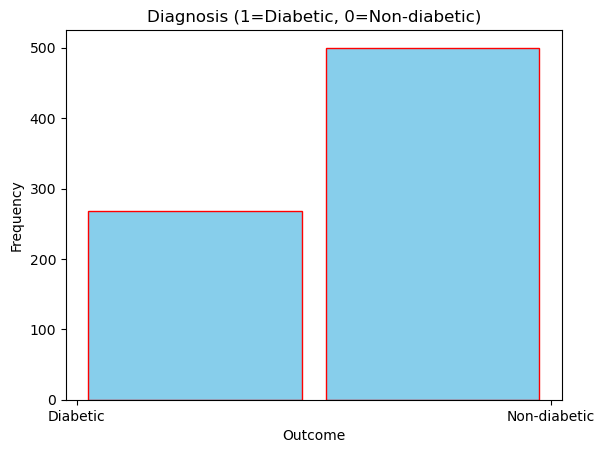

In [325]:
# Create histogram for 'Outcome' column
plt.hist(diabetes_dataset['Outcome'], bins=2, edgecolor='r', color='skyblue', rwidth=0.9)
plt.title('Diagnosis (1=Diabetic, 0=Non-diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

### Step 5: Creating a set of histograms for various features

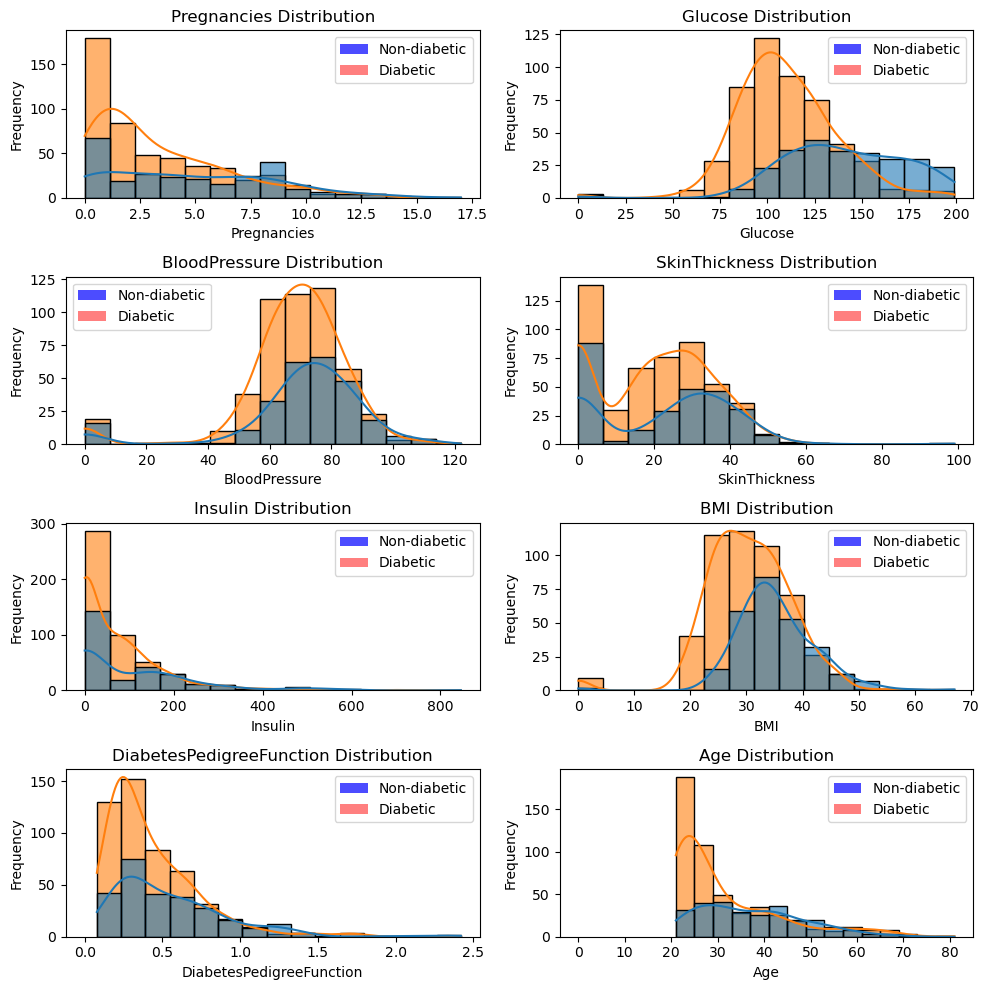

In [327]:
# Define features to visualize
X = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Create subplots
plt.figure(figsize=(10, 10))

for i, X in enumerate(X):
    plt.subplot(4, 2, i + 1)  # Create a subplot grid of 3x2
    
    # Plot histogram for non-diabetic cases
    plt.hist(diabetes_dataset[diabetes_dataset['Outcome'] == 0][X], bins=15, color='blue', alpha=0.7, label='Non-diabetic')
    
    # Plot histogram for diabetic cases
    plt.hist(diabetes_dataset[diabetes_dataset['Outcome'] == 1][X], bins=15, color='red', alpha=0.5, label='Diabetic')
    sns.histplot(data=diabetes_dataset, x=X, hue='Outcome', kde=True, bins=15, alpha=0.6)
    # Add title and legend
    plt.title(f'{X} Distribution')
    plt.xlabel(X)
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Display the histograms
plt.show()


### Step 6: Data Standardising

In [329]:
# data standardising
scaler = StandardScaler()

In [395]:
scaler.fit(X)
standardized_data = scaler.transform(X)

In [397]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [399]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [401]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0          Diabetic
1      Non-diabetic
2          Diabetic
3      Non-diabetic
4          Diabetic
           ...     
763    Non-diabetic
764    Non-diabetic
765    Non-diabetic
766        Diabetic
767    Non-diabetic
Name: Outcome, Length: 768, dtype: object


In [403]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
Diabetic,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
Non-diabetic,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


### Step 7: Splitting the data into training and 
testing sets

In [406]:
# train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=42)

In [408]:
# Split the dataset into training and testing sets
train_diabetes_dataset, test_diabetes_dataset = train_test_split(diabetes_dataset, test_size=0.3, random_state=42)

# Print the sizes of the training and testing sets
print(f'Training set size: {len(train_diabetes_dataset)} rows')
print(f'Testing set size: {len(test_diabetes_dataset)} rows')


Training set size: 537 rows
Testing set size: 231 rows


### Step 8: Training the model by using Support Vector Machine

In [411]:
#training the model

In [413]:
model = svm.SVC(kernel = 'linear')

In [415]:
# training the support vecctor machine clasifier
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [417]:
# model evaluation

In [419]:
#accuracy score

In [421]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [423]:
print(f'Training Accuracy: {training_data_accuracy:.2f}')

Training Accuracy: 0.78


In [425]:
# accuracy score on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test )

In [427]:
print(f'Testing Accuracy: {testing_data_accuracy:.2f}')

Testing Accuracy: 0.77


### Step 9: Classification model

In [430]:
def classification_model(model, X_train, X_test, Y_train, Y_test, n_folds=5):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print(f'Testing Accuracy: {accuracy:.2f}')

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, Y_train, cv=n_folds)
    print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')
classification_model(model, X_train, X_test, Y_train, Y_test, n_folds=5)

Testing Accuracy: 0.77
Mean Cross-Validation Score: 0.78


### Step 10: Logistic Regression model

In [460]:
#  Logistic Regression model
logistic_model = LogisticRegression()
classification_model(logistic_model, X_train, X_test, Y_train, Y_test)
# Create a Logistic Regression model
model = LogisticRegression()  # Increase max_iter for potential convergence issues

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Testing Accuracy: 0.78
Mean Cross-Validation Score: 0.77
Accuracy: 0.7792207792207793
Confusion Matrix:
[[ 48  33]
 [ 18 132]]


In [462]:
#makin a predictive system

In [464]:
input_data = (4,110,92,0,0,37.6,0.191,30)

In [466]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardized the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = model.predict(std_data)
print(prediction)
if (prediction[0]== 0):
    print('The person is not diabetic')
else:
    print('THe person is daibetic')

[[ 4.00000000e+00  1.10000000e+02  9.20000000e+01 -5.20417043e-17
   1.61907524e-17  3.76000000e+01  1.91000000e-01  3.00000000e+01]]
['Diabetic']
THe person is daibetic


In [474]:
input_data = (1,85,66,29,0,26.6,0.351,31)

In [476]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardized the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = model.predict(std_data)
print(prediction)
if (prediction[0]== 0):
    print('The person is not diabetic')
else:
    print('THe person is daibetic')

[[1.00000000e+00 8.50000000e+01 6.60000000e+01 2.90000000e+01
  1.61907524e-17 2.66000000e+01 3.51000000e-01 3.10000000e+01]]
['Diabetic']
THe person is daibetic


### Step 11: Conclusion  